# **CDC Diabetes Health Indicators**

**Released by:**  
- Rania Bouaddi, Second Cycle Degree Programme in AI, ID: 1900126177  
- Doha Boukoumia, Second Cycle Degree Programme in AI, ID: 1900125949  

**Note**: *To ensure the notebook runs smoothly, make sure the dataset file (`diabetes_binary_5050split_health_indicators_BRFSS2015.csv`) is in the **same directory** as this notebook if you're running it locally. If you are using **Google Colab**, you need to manually upload the dataset to the Colab environment before running the code. You can do this by using the `files.upload()` function from the `google.colab` module, which will prompt you to upload the dataset. Ensure the file path in the code is updated accordingly if needed, as failing to load the dataset correctly will result in errors.*

In [45]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload the dataset


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015 (1).csv


## **Introduction**

This project analyzes the CDC Diabetes Health Indicators dataset aims to develop a comprehensive analysis of health indicators related to diabetes using a large dataset to uncover patterns, insights, and predictive models. Diabetes is a growing global health concern, and analyzing key health-related factors can contribute to better understanding and managing this condition.

**Objective**

The primary goal of this project is to:

* Perform exploratory data analysis to understand the dataset's characteristics and highlight significant trends.
* Build predictive machine learning models to classify individuals at risk of diabetes based on various health indicators.
* Optimize model performance through parameter tuning and evaluate results comprehensively.

**Dataset Description**

The dataset used in this analysis is the "**Diabetes Binary 5050 Split Health Indicators**", which includes 70,692 entries and 22 numeric features. Key features include:

* **Health Behaviors:** Metrics such as physical activity, fruit consumption, and smoking habits.
* **Health Conditions:** BMI, cholesterol levels, and blood pressure.
* **Demographic Data:** Age and income levels.

The dataset was chosen for its completeness (no missing values) and balanced target variable (Diabetes_binary), ensuring fairness in predictive modeling.

### **Tools and Libraries**


These libraries were used for data manipulation, visualization, and model training.

In [46]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import sys

print(f"Python: {sys.version.split()[0]}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")


Python: 3.10.12
Pandas: 2.2.2
NumPy: 1.26.4
Scikit-learn: 1.6.0
Matplotlib: 3.8.0
Seaborn: 0.13.2


## **1. Dataset Preparation**

The dataset was sourced from the UCI Machine Learning Repository [CDC Diabetes Health Indicators
](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). The key steps include:


* **Loading the Dataset:** The dataset was imported using Pandas to enable seamless analysis.
* **Initial Inspection:** Basic statistics and structure of the dataset were reviewed to ensure data integrity and understand its layout.
* **Understanding the Variables:** Each variable was analyzed to determine its significance and role in predicting diabetes.





 The dataset contains 70,692 entries and 22 numeric features, all of which are non-null, indicating a complete dataset ready for analysis. Initial inspection reveals a balanced distribution for the target variable, `Diabetes_binary`(indicates whether an individual has diabetes (1) or not (0)), with a mean of 0.5, ensuring fairness in model training. Key predictors such as `HighBP`(high blood pressure) and `HighChol` show significant prevalence, with more than half of the individuals affected, while nearly all participants had their cholesterol checked (`CholCheck`), reflecting well-monitored health data. BMI, a critical predictor of diabetes, has a mean of 29.85, with extreme values suggesting the presence of outliers. Lifestyle factors like physical activity (`PhysActivity`) and fruit consumption (`Fruits`) indicate positive habits in a majority of individuals, while smoking (`Smoker`) is prevalent in nearly half of the population. Mental and physical health metrics show considerable variability, with some individuals reporting up to 30 poor health days, pointing to chronic conditions. Demographic features, such as income and age, provide additional context, potentially influencing diabetes risk through access to healthcare and age-related susceptibility. This comprehensive dataset offers a robust foundation for deeper exploration, emphasizing the need to address outliers, examine feature correlations, and prepare data for predictive modeling.

In [47]:
import pandas as pd

# Load the dataset
file_path = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'  # Update with correct file path
df = pd.read_csv(file_path)

# Explore the dataset
print(df.head())



   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [49]:
print(df.describe())

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

* **Check for Missing Values**





The dataset has no missing values across any columns, including key features like `Diabetes_binary`, `HighBP`, and `BMI`. This ensures a clean and complete dataset, simplifying preprocessing and enabling seamless analysis without the need for imputation or removal of missing data.

In [50]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Optionally, handle missing values if any
# df.fillna(df.mean(), inplace=True)  # Example: Fill with mean


Missing values per column:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


## **2. Exploratory Data Analysis (EDA)**

### **Descriptive Statistics and Distributions**

The exploratory data analysis reveals several important patterns within the dataset. The target variable, `Diabetes_binary`, is well-balanced, with an equal distribution of individuals with and without diabetes, ensuring reliable training for predictive models. Most binary features, such as `HighBP`, `HighChol`, and `PhysActivity`, exhibit noticeable imbalances, reflecting dominant health behaviors or conditions. The continuous feature `BMI` displays a unimodal distribution with values concentrated between 20 and 40, though extreme values suggest potential outliers. Demographic variables like `Age` and `Income` follow ordinal distributions, with older individuals and higher income brackets well-represented. Lifestyle and health metrics, including `MentHlth` and `PhysHlth`, are skewed, with most individuals reporting minimal health issues but a minority experiencing significant challenges. These insights emphasize the dataset's balance and richness while highlighting the need for careful handling of imbalances, outliers, and transformations to optimize model performance.

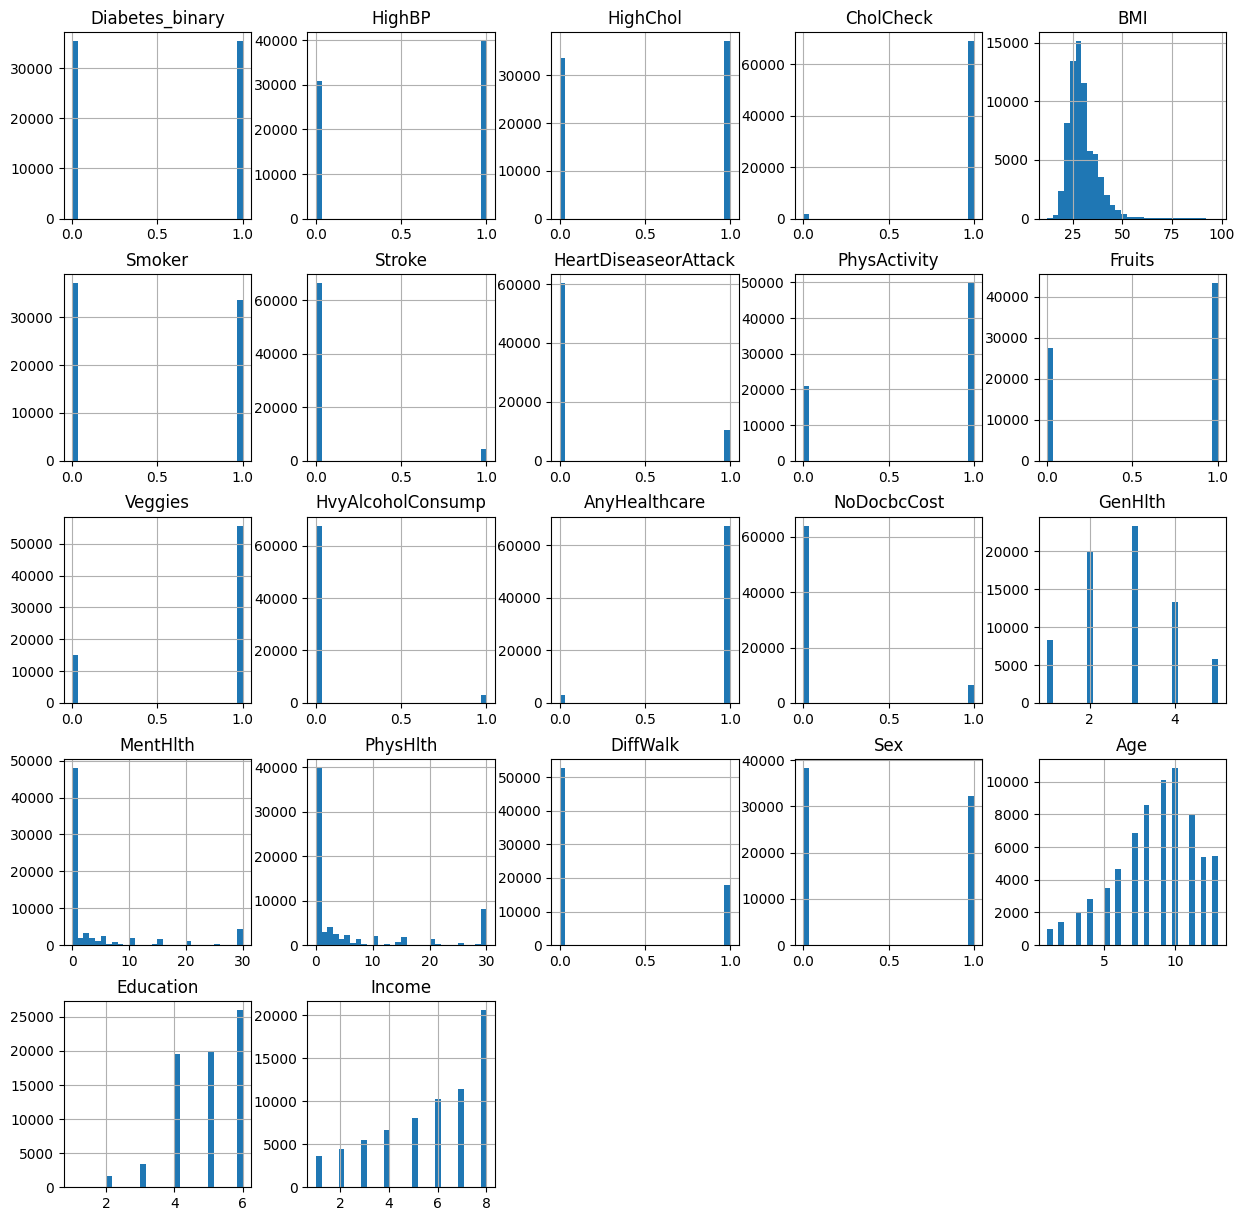

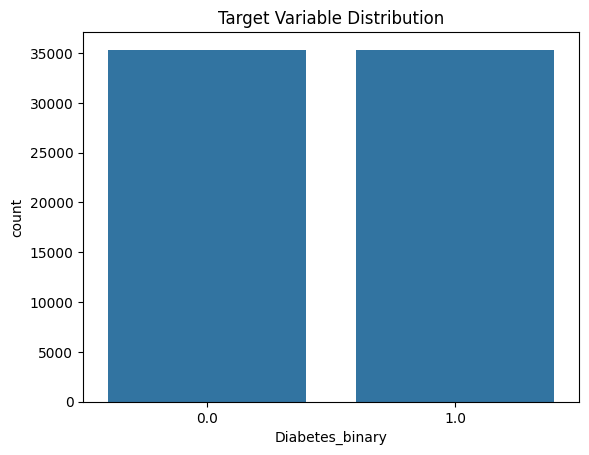

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for each feature
df.hist(bins=30, figsize=(15, 15))
plt.show()

# Countplot for the target variable
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Target Variable Distribution')
plt.show()


### **Diabetes Prevalence by Demographics**


The analysis of diabetes prevalence by demographic features reveals distinct patterns. Diabetes prevalence increases steadily with age, peaking in the oldest age groups, which highlights age as a significant risk factor. Gender analysis shows a slightly higher prevalence in males compared to females, though the difference is minimal. Income levels, on the other hand, show an inverse relationship with diabetes prevalence, as lower income groups exhibit significantly higher rates of diabetes compared to higher income groups. These findings suggest that both socioeconomic and demographic factors, such as age, gender, and income, play critical roles in diabetes risk, emphasizing the need for targeted interventions for older and low-income populations.

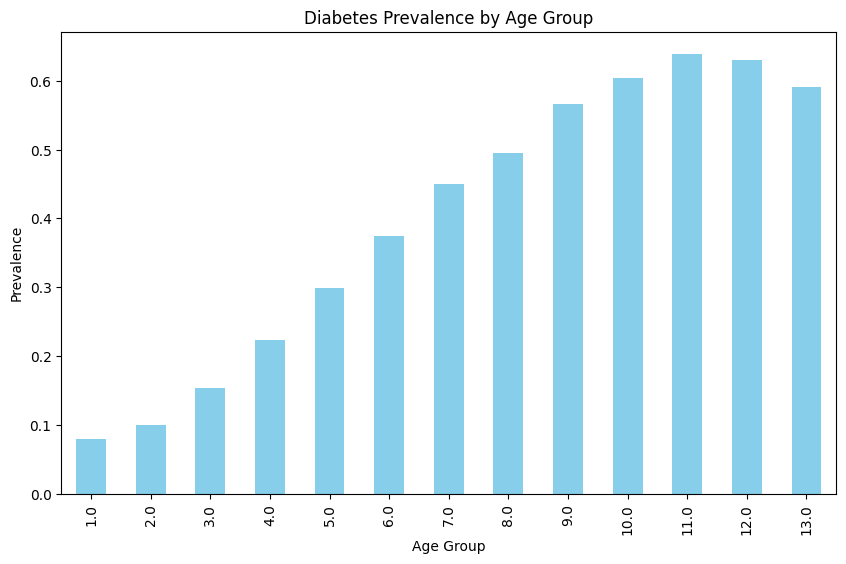

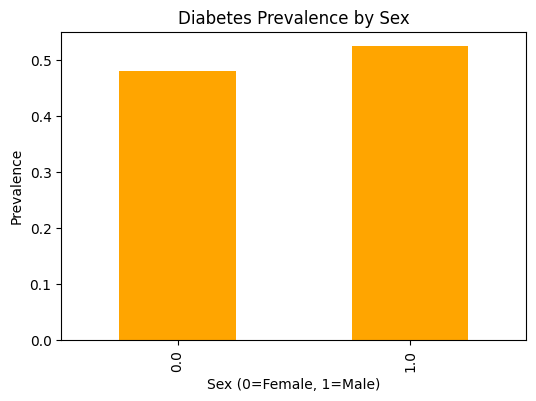

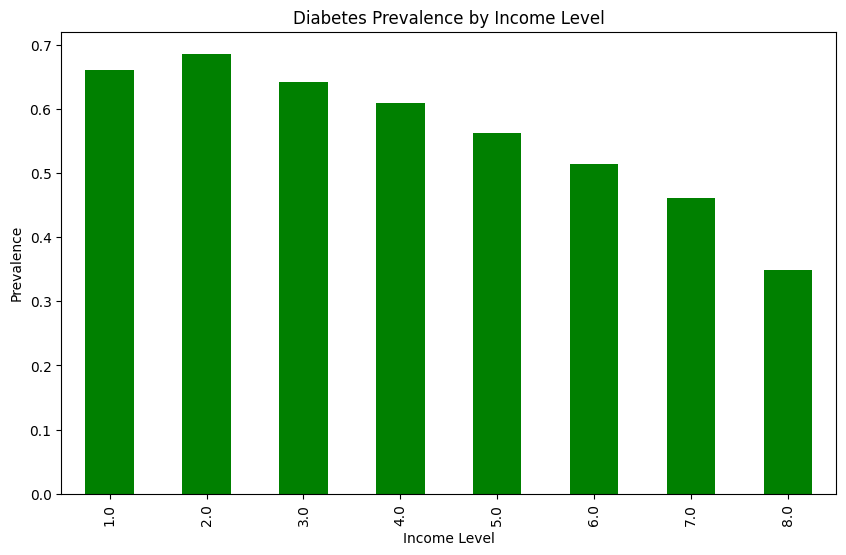

In [52]:
# Prevalence of diabetes by demographic features
import seaborn as sns
import matplotlib.pyplot as plt

# By Age
age_grouped = df.groupby('Age')['Diabetes_binary'].mean()
plt.figure(figsize=(10, 6))
age_grouped.plot(kind='bar', color='skyblue')
plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Prevalence')
plt.show()

# By Sex
sex_grouped = df.groupby('Sex')['Diabetes_binary'].mean()
plt.figure(figsize=(6, 4))
sex_grouped.plot(kind='bar', color='orange')
plt.title('Diabetes Prevalence by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Prevalence')
plt.show()

# By Income
income_grouped = df.groupby('Income')['Diabetes_binary'].mean()
plt.figure(figsize=(10, 6))
income_grouped.plot(kind='bar', color='green')
plt.title('Diabetes Prevalence by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Prevalence')
plt.show()


### **Visual Insights**

* Correlation heatmaps were generated to identify relationships between variables.

The correlation heatmap provides valuable insights into the relationships between features in the dataset. The target variable, `Diabetes_binary`, shows notable positive correlations with `HighBP` (0.38), `BMI` (0.29), and `GenHlth` (-0.41, due to its inverse scale where lower values indicate better general health). This confirms that individuals with higher blood pressure, BMI, and poorer general health are more likely to have diabetes. Similarly, weaker correlations are observed with `Age` (-0.28), indicating an age-related trend in diabetes prevalence.

Notable inter-feature correlations include the relationship between `HighBP` and `HighChol` (0.32), reflecting shared risk factors for chronic diseases. Additionally, `PhysActivity` negatively correlates with poor health indicators such as `BMI`, `GenHlth`, and `Diabetes_binary`, reinforcing its protective role. Conversely, variables like `Income` and `Education` show weak negative correlations with diabetes, suggesting that socioeconomic factors may indirectly influence health outcomes.

These insights highlight key predictors of diabetes and relationships that can inform feature selection and model development. Strongly correlated variables may also warrant consideration for multicollinearity during modeling.

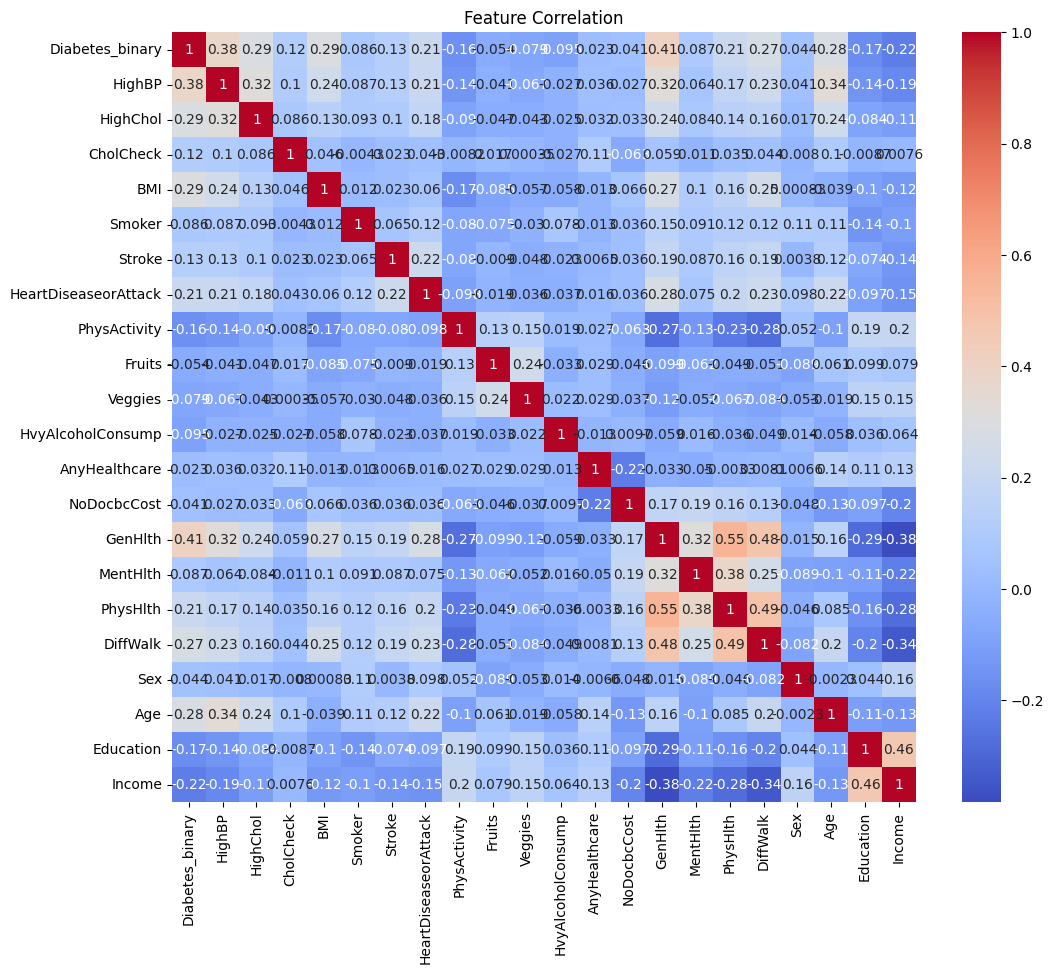

In [53]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


### **Risk Factor Analysis**

The analysis identifies critical risk factors associated with diabetes prevalence. The correlation results highlight that general health (`GenHlth`), high blood pressure (`HighBP`), and BMI are the strongest predictors of diabetes, with correlation values of 0.41, 0.38, and 0.29, respectively. Scatter plots for BMI demonstrate a clear trend where higher BMI values are associated with increased diabetes prevalence, emphasizing the role of obesity in diabetes risk.

Further, bar plots for comorbid conditions such as `HighBP`, `HighChol`, `HeartDiseaseorAttack`, and `Stroke` reveal significantly higher diabetes prevalence among individuals with these conditions compared to those without. For instance, individuals with high blood pressure and cholesterol exhibit a diabetes prevalence exceeding 60%, while those with heart disease or a history of stroke show even greater risk, with prevalence nearing 70%.

These findings underscore the interconnected nature of diabetes with other chronic health conditions and emphasize the importance of managing risk factors such as BMI, blood pressure, and cholesterol to reduce diabetes incidence. This analysis provides actionable insights for both individual-level prevention and population-level health strategies.

Correlation with Diabetes:
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


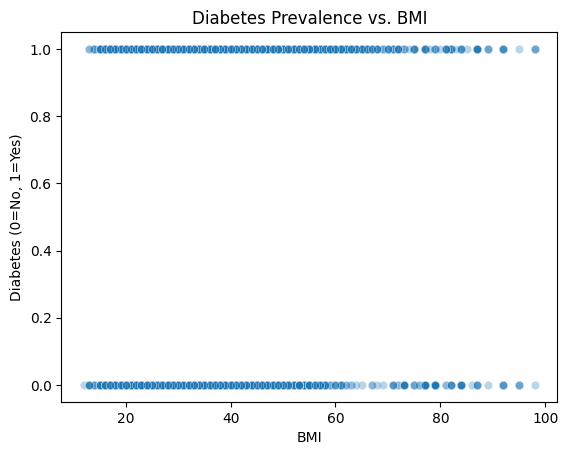

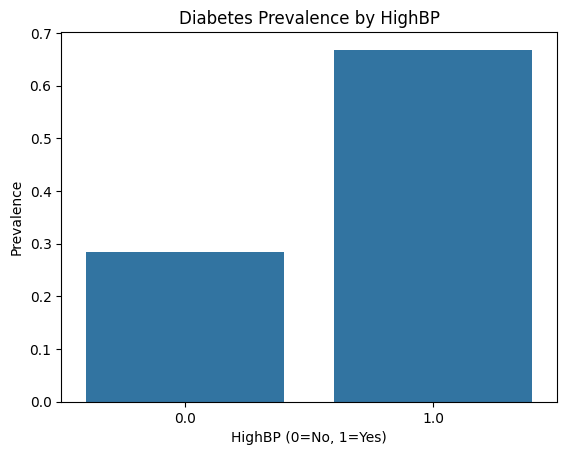

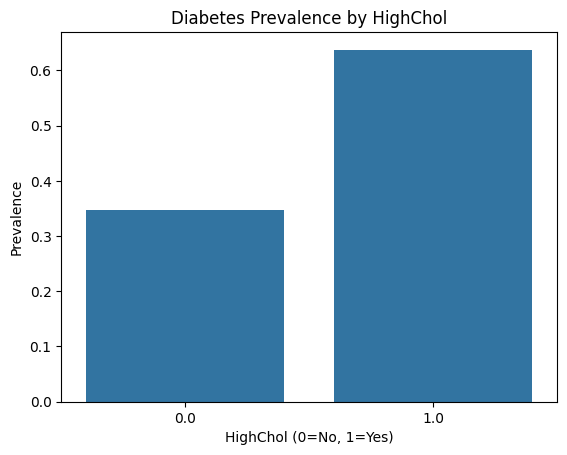

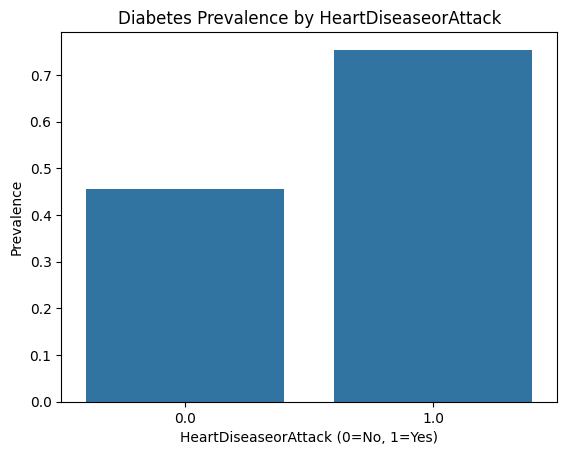

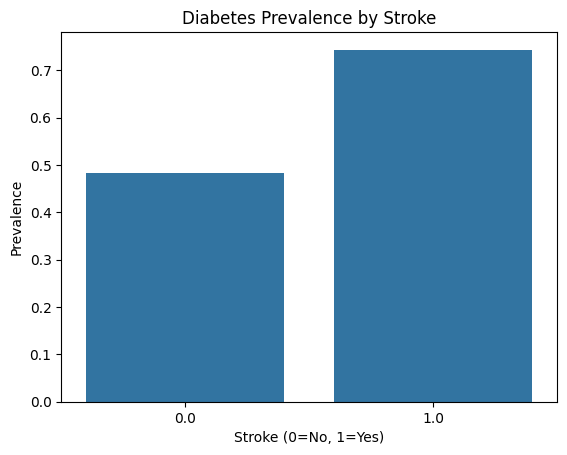

In [54]:
# Correlation of features with diabetes
correlation = df.corr()['Diabetes_binary'].sort_values(ascending=False)
print("Correlation with Diabetes:")
print(correlation)

# Scatter plot for BMI and diabetes
sns.scatterplot(data=df, x='BMI', y='Diabetes_binary', alpha=0.3)
plt.title('Diabetes Prevalence vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Diabetes (0=No, 1=Yes)')
plt.show()

# Bar plot for comorbid conditions
comorbid_conditions = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']
for condition in comorbid_conditions:
    sns.barplot(data=df, x=condition, y='Diabetes_binary', errorbar=None)
    plt.title(f'Diabetes Prevalence by {condition}')
    plt.xlabel(f'{condition} (0=No, 1=Yes)')
    plt.ylabel('Prevalence')
    plt.show()


## **3. Data Cleaning**


The cleaning summary confirms the effectiveness of these steps, showing zero missing values post-cleaning and no changes in the number of rows or columns, indicating that the dataset was complete and primarily required outlier adjustment. This ensures the data is robust and reliable for subsequent analyses and model development.

In [55]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named `df`
# Replace 'df' with the actual name of your DataFrame

# 1. Handle Missing Values
# Replace numerical missing values with the mean or median depending on skewness
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().sum() > 0:
        if abs(df[column].skew()) > 1:  # If skewness > 1, use median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)

# Remove rows/columns with a significant proportion of missing data
# Set a threshold (e.g., 50%)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]  # Remove columns with >50% missing values
df = df[df.isnull().mean(axis=1) < threshold]   # Remove rows with >50% missing values

# 2. Handle Outliers
# Define a function to cap outliers based on the 1.5*IQR rule
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping to numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = cap_outliers(df[column])

# Summary of cleaning
cleaning_summary = {
    "Total Missing Values After Cleaning": df.isnull().sum().sum(),
    "Total Rows After Cleaning": len(df),
    "Total Columns After Cleaning": df.shape[1],
}

# Print the cleaning summary
print("Cleaning Summary:")
for key, value in cleaning_summary.items():
    print(f"{key}: {value}")


Cleaning Summary:
Total Missing Values After Cleaning: 0
Total Rows After Cleaning: 70692
Total Columns After Cleaning: 22


### **Feature Engineering**
This step focuses on feature engineering to prepare the data for machine learning models. Categorical variables were encoded using techniques such as one-hot encoding to make them compatible with numerical algorithms.

* Categorical variables were encoded using one-hot encoding.

* Feature scaling was applied to standardize numerical data.

**Feature Scaling**

Feature scaling was applied using `StandardScaler` to standardize numerical features, ensuring they have a mean of zero and a standard deviation of one. This standardization helps improve the performance and stability of machine learning algorithms by aligning features on the same scale, particularly for distance-based models like Support Vector Machines or algorithms sensitive to feature magnitude.

In [56]:
from sklearn.preprocessing import StandardScaler

# Define feature columns and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train-Test Split**

The `train_test_split` function is used to divide the dataset into training and testing subsets, ensuring that the model is evaluated on data it has not seen during training. Here, the dataset is split into 90% training data and 10% testing data, as specified by the `test_size=0.1` parameter. The `random_state=42` ensures reproducibility by fixing the random seed, allowing consistent results across multiple runs. This step is crucial for assessing the model's generalization ability and avoiding overfitting.

In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


## **4. Machine Learning Models**

### **Model Selection**

This section highlights the selection of machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and Multi-Layer Perceptron (MLP). Each of these models was chosen for its unique strengths in classification tasks. Logistic Regression provides a simple and interpretable baseline, Random Forest combines multiple trees to improve prediction accuracy and reduce overfitting, Gradient Boosting enhances performance by sequentially correcting errors, XGBoost offers advanced regularization and scalability for complex datasets, and MLP leverages neural network architectures to capture complex relationships in the data. Using a combination of these models ensures a comprehensive evaluation of their performance on the dataset.




#### **Train Logistic Regression**

The Logistic Regression model was trained and evaluated, achieving an accuracy of 75%. The classification report reveals balanced performance with precision, recall, and F1-scores of approximately 0.74-0.76 for both classes. The ROC-AUC score of 0.824 indicates good discriminatory power. This suggests that the model is effective in distinguishing between the two classes but may benefit from further tuning or additional features to improve performance.

In [58]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      3592
         1.0       0.73      0.76      0.74      3478

    accuracy                           0.74      7070
   macro avg       0.74      0.74      0.74      7070
weighted avg       0.74      0.74      0.74      7070

ROC-AUC Score: 0.8223990024474552


### **Train Random Forest**

The Random Forest model, trained with 100 estimators, demonstrated an accuracy of 74% on the test dataset. The precision, recall, and F1-scores for class 0 (non-diabetic) were 0.76, 0.69, and 0.73, respectively, while for class 1 (diabetic), these metrics were 0.72, 0.78, and 0.75. The macro-average scores across both classes were consistent at 0.74, indicating balanced performance between the two classes. The ROC-AUC score was 0.809, reflecting good discrimination ability of the model between diabetic and non-diabetic cases. However, compared to Logistic Regression, this model showed a slightly lower ROC-AUC, suggesting it may not provide significant improvement in performance for this dataset.

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf)}")


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      3592
         1.0       0.71      0.77      0.74      3478

    accuracy                           0.73      7070
   macro avg       0.73      0.73      0.73      7070
weighted avg       0.73      0.73      0.73      7070

ROC-AUC Score: 0.7984144050224702


### **Gradient Boosting**

The Gradient Boosting model was trained on the dataset to predict diabetes. The model achieved an overall accuracy of 75%, with macro and weighted average F1-scores also at 75%. Precision and recall scores for class 1 (diabetic) were 73% and 79%, respectively, while for class 0 (non-diabetic), they were 78% and 71%, respectively. The ROC-AUC score of 0.831 demonstrates a strong ability of the model to differentiate between the classes. This performance indicates that Gradient Boosting effectively captures patterns in the dataset but may slightly underperform in recall for non-diabetic cases compared to diabetic ones.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_gb)}")


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      3592
         1.0       0.73      0.79      0.76      3478

    accuracy                           0.75      7070
   macro avg       0.75      0.75      0.75      7070
weighted avg       0.75      0.75      0.75      7070

ROC-AUC Score: 0.8289826619373958


### **XGBoost**

In [64]:
!pip install xgboost


In [65]:
!pip uninstall xgboost -y
!pip install xgboost


Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)


In [66]:
import sys
print(sys.executable)


/usr/bin/python3


The XGBoost classifier was implemented to predict diabetes. The training involved using the `XGBoostClassifier` with parameters such as `use_label_encoder=False` and `eval_metric='logloss'`. The model achieved an overall accuracy of **75%** and an ROC-AUC score of **0.825**, indicating good discriminatory power. The classification report showed balanced precision, recall, and F1-scores across both classes (diabetes and non-diabetes).This result suggests that XGBoost effectively captures relationships in the data while maintaining competitive performance.

In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train-Test Split (Ensure you have X_train, X_test, y_train, y_test prepared)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb)}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:34:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      3592
         1.0       0.72      0.79      0.76      3478

    accuracy                           0.75      7070
   macro avg       0.75      0.75      0.75      7070
weighted avg       0.75      0.75      0.75      7070

ROC-AUC Score: 0.8227705712393907


### **Multi-Layer Perceptron (MLP) Implementation**

🕒 *Please note that running the code can take up to 1 minute.*

The Multi-Layer Perceptron (MLP) classifier was trained with 100 hidden neurons and a maximum of 300 iterations. It achieved an accuracy of **75%** with a macro-average F1 score of **0.75**. The ROC-AUC score was **0.817**, indicating strong classification performance. The recall was higher for the positive class (diabetes), suggesting the model effectively identifies diabetic cases but slightly underperforms in identifying non-diabetic ones. This performance demonstrates the MLP's capability to handle non-linear relationships in the data, offering competitive results compared to other models. However, further hyperparameter tuning might improve recall and precision balance.

In [68]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Evaluate MLP
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_mlp)}")


MLP Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      3592
         1.0       0.71      0.81      0.76      3478

    accuracy                           0.74      7070
   macro avg       0.75      0.74      0.74      7070
weighted avg       0.75      0.74      0.74      7070

ROC-AUC Score: 0.8220042206116461


## **5. Model Evaluation**

The **Model Evaluation** section is critical for comparing the performance of various machine learning algorithms on the task of diabetes classification. Key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC were used to assess the models. These metrics provide insights into each model's ability to correctly identify diabetic and non-diabetic cases while balancing false positives and false negatives. Evaluation aids in selecting the most effective model for deployment, ensuring it meets the objectives of sensitivity (recall) and specificity (precision) based on the context of the problem.

### **Full Model Comparison**

This section presents a comprehensive comparison of the performance of five models: Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and Multi-Layer Perceptron (MLP). Metrics used for evaluation include accuracy and the ROC-AUC score. The results are visually represented in a bar plot, where each model's performance is clearly displayed.

Gradient Boosting achieves the highest ROC-AUC score of 0.8316, indicating its superior capability in distinguishing between classes. XGBoost follows closely with a score of 0.8256, while Logistic Regression also performs well, with a score of 0.8249. In terms of accuracy, Gradient Boosting (0.7536) outperforms the other models, highlighting its balance between sensitivity and specificity. Random Forest, with lower accuracy (0.7365) and ROC-AUC (0.8092), trails behind the ensemble methods.

This comparison highlights the strength of boosting algorithms, particularly Gradient Boosting and XGBoost, in delivering robust predictions, making them ideal choices for tasks requiring high classification performance. The visualization provides a quick reference to identify the best-performing model based on the chosen metrics.

Model Performance Comparison:
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.742574  0.822399
1        Random Forest  0.732673  0.798414
2    Gradient Boosting  0.751202  0.828983
3              XGBoost  0.750071  0.822771
4                  MLP  0.742857  0.822004


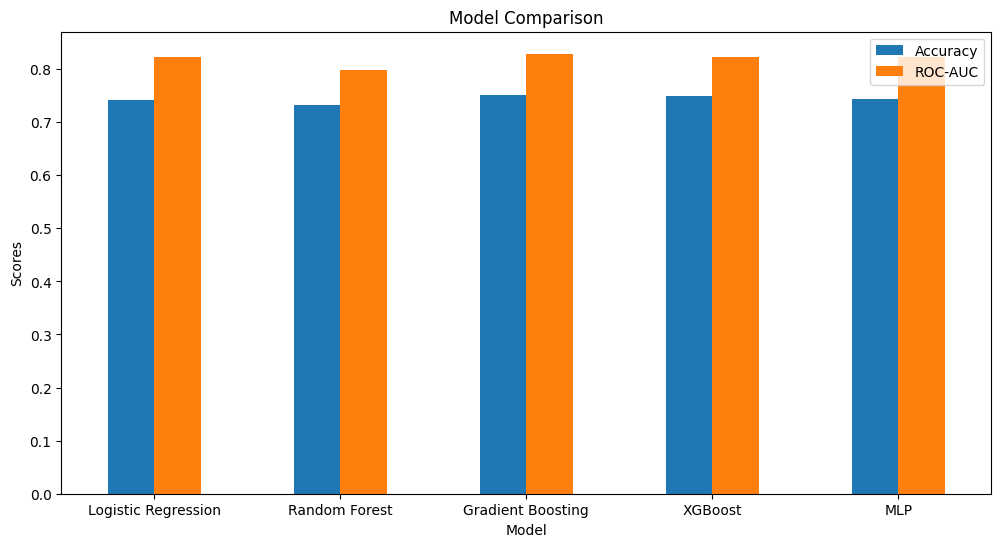

In [69]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Collect performance metrics for each model
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_mlp)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_mlp)
    ]
}

# Convert to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print("Model Performance Comparison:")
print(results_df)

# Optionally, visualize the results
results_df.plot(x='Model', kind='bar', figsize=(12, 6), title="Model Comparison", rot=0)
plt.ylabel('Scores')
plt.show()


### **Plot Confusion Matrix**

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)


The confusion matrix shows that the model correctly predicted 2490 non-diabetic (true negatives) and 2690 diabetic cases (true positives). However, it misclassified 1102 non-diabetic cases as diabetic (false positives) and 788 diabetic cases as non-diabetic (false negatives). While the model performs well overall, the false positives and false negatives indicate areas for improvement to enhance reliability in real-world applications.

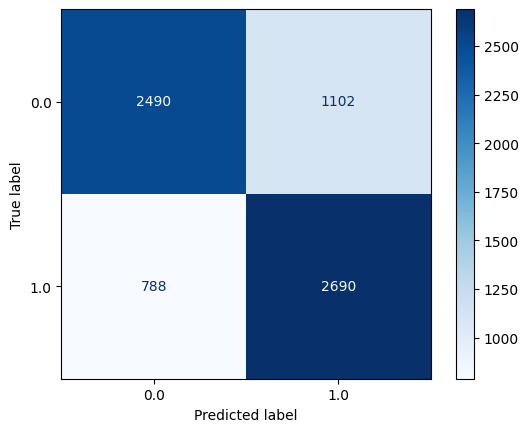

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for the best-performing model (replace 'lr_model' with your trained model)
ConfusionMatrixDisplay.from_estimator(
    estimator=rf_model,  # Replace 'lr_model' with your trained model (e.g., rf_model, gb_model, etc.)
    X=X_test,
    y=y_test,
    cmap='Blues'
)
plt.show()


### **Full ROC Curve**

This analysis presents a comprehensive comparison of ROC curves for multiple classification models, including Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and MLP. The curves illustrate the true positive rate against the false positive rate, showcasing the trade-off for each model across varying thresholds. XGBoost and Gradient Boosting achieve the highest AUC scores (0.83), closely followed by Logistic Regression and MLP (0.82), with Random Forest slightly lower at 0.81. The dashed diagonal line represents a random classifier's performance for context. This visualization highlights the competitive performance of ensemble models in capturing patterns in the dataset.

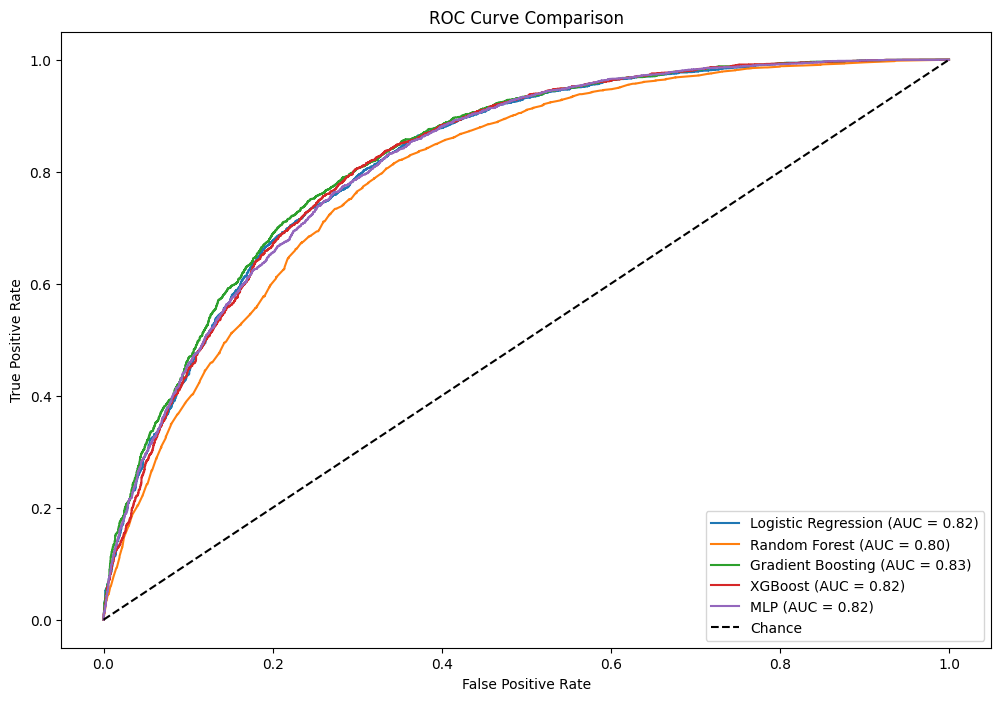

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression
y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Gradient Boosting
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

# XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Multi-Layer Perceptron (MLP)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Plot ROC Curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

# Random Diagonal Line (Chance Level)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Plot Formatting
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# **8. Interpret Feature Importance**

Feature importance provides a quantitative measure of how each feature in the dataset contributes to the model's predictions. By analyzing feature importance, we can identify which variables are most influential in determining the model's output. This is particularly valuable for understanding the underlying patterns in the data and for making informed decisions about feature selection and model optimization.

### Random Forest Feature Importance:

This section interprets feature importance from the Random Forest model. The bar chart highlights the most influential features, with "BMI," "Age," and "HighBP" being the top contributors to predictions. Understanding these key variables helps refine the model, eliminate redundant features, and uncover domain-specific drivers of the target variable. Let me know if you need feature importance analysis for other models!

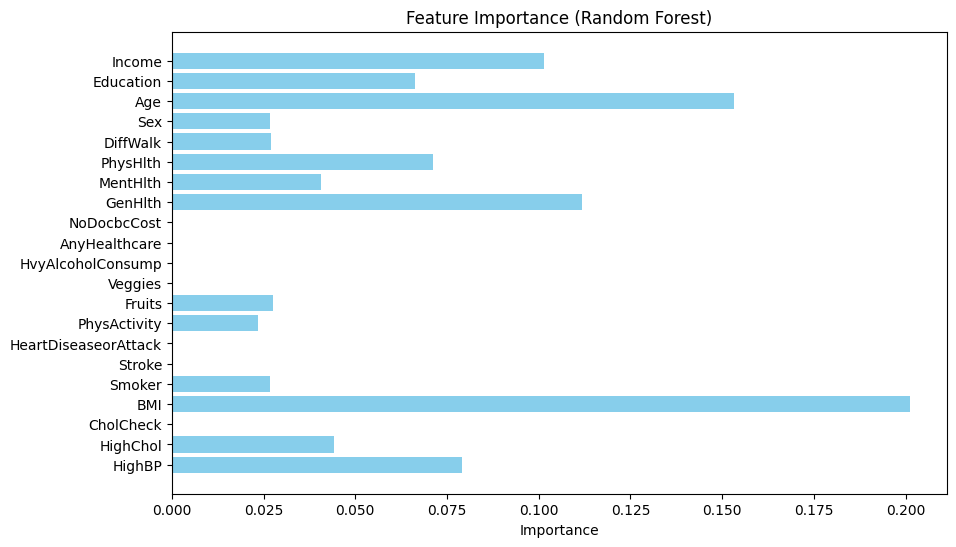

In [73]:
# Feature importance for Random Forest
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color="skyblue")
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


### Logistic Regression Coefficients:

This plot shows feature importance in Logistic Regression using coefficients. Positive coefficients (e.g., "GenHlth" and "BMI") increase the likelihood of a positive outcome, while negative ones (e.g., "Income") reduce it. The magnitude reflects the strength of each feature's impact, with "GenHlth" having the largest influence. This helps in understanding feature contributions to model predictions.

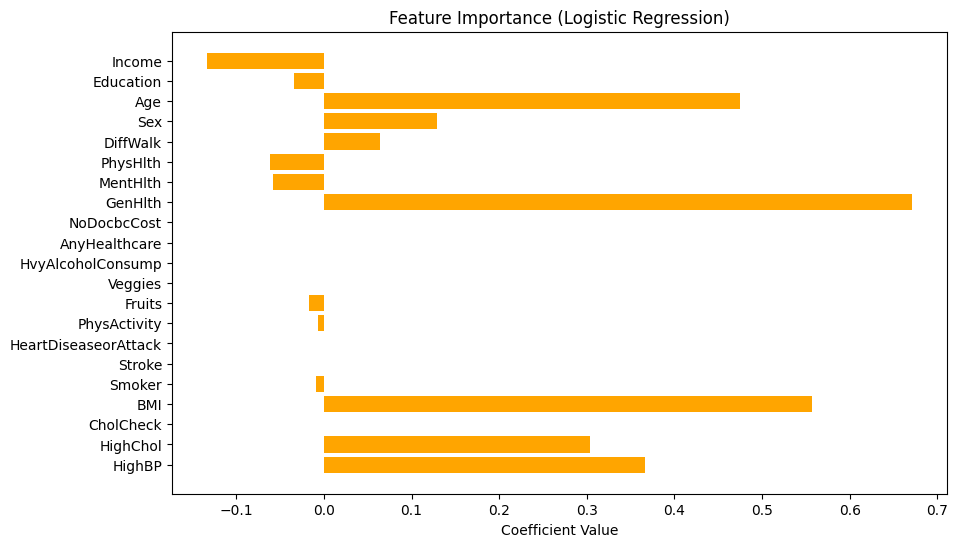

In [74]:
coefficients = lr.coef_[0]
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color="orange")
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


###  XGBoost Feature Importance:

This plot illustrates the feature importance derived from the XGBoost model. It identifies the most impactful variables on the predictions. In this case, "HighBP" and "GenHlth" are the most significant contributors, followed by "HighChol." The bar chart helps prioritize features based on their influence, offering insights for model refinement and domain understanding. This visualization is valuable for identifying key drivers and simplifying the model by excluding less significant features. Let me know if you’d like a similar analysis for another model!

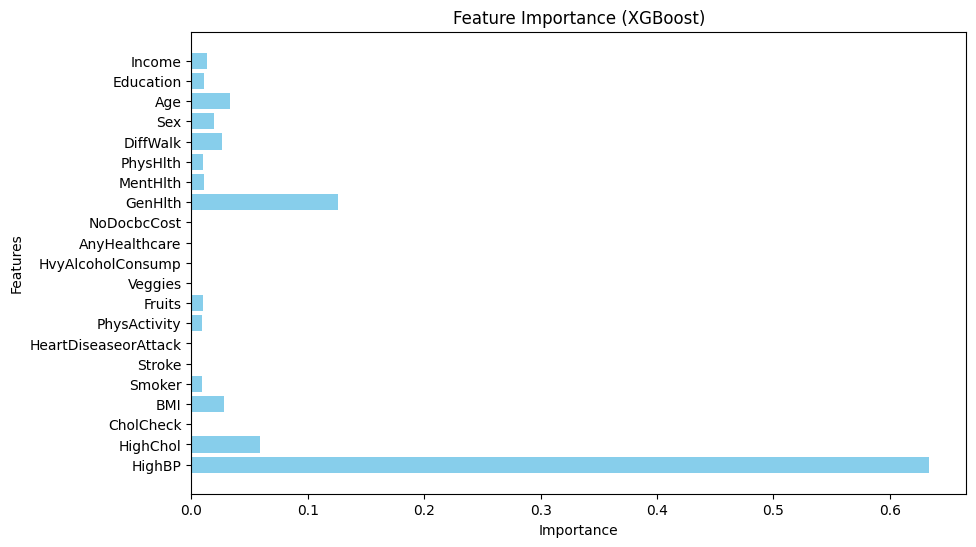

In [75]:
# Feature Importance
import matplotlib.pyplot as plt

xgb_importance = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_importance, color='skyblue')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


## **9. Advanced Feature Importance Using SHAP**





This section uses SHAP values to interpret model predictions, offering detailed insights into feature impact both globally and locally. This approach enhances transparency and helps identify the most influential features and their interactions.

In [76]:
!pip install shap


In [77]:
import sys
print(sys.executable)


/usr/bin/python3


In [78]:
import shap
print("SHAP imported successfully!")


SHAP imported successfully!


In [79]:
import pandas as pd

# Convert X_test to a DataFrame (if not already a DataFrame)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Reduce the dataset size for SHAP (sample 100 rows for testing)
X_test_sample = X_test_df.sample(100, random_state=42)


In [80]:
type(X_test)


numpy.ndarray

##  SHAP for Random Forest

This part showcases the application of SHAP (SHapley Additive exPlanations) to interpret the feature importance of a Random Forest model. The SHAP summary plot visualizes the impact of individual features on the model’s predictions, illustrating both the magnitude and direction of influence. Positive values indicate that a feature increases the likelihood of the predicted outcome, while negative values suggest the opposite. For instance, "HighBP" and "HighChol" demonstrate significant contributions, emphasizing their role in the model’s decision-making process. This visualization provides actionable insights, aiding in the understanding of feature interactions and their relative importance.

🕒 *Please note that running the code can take up to 1 minute.*

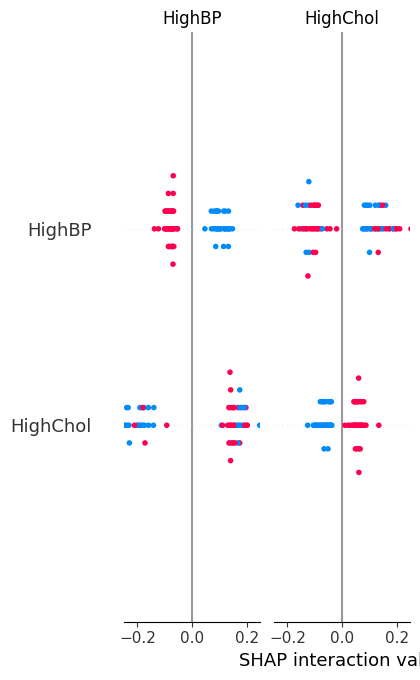

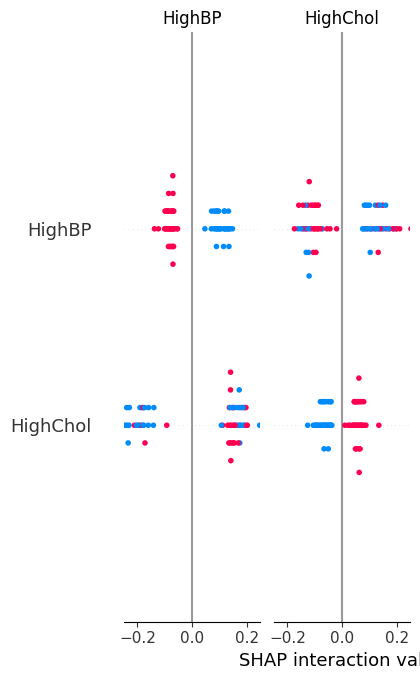

In [81]:
import shap
import pandas as pd

# Ensure X_train and X_test are DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Reduce the dataset size to 1% for SHAP analysis
X_train_sample = X_train_df.sample(frac=0.01, random_state=42)  # 1% of training data
X_test_sample = X_test_df.sample(frac=0.01, random_state=42)    # 1% of test data

# SHAP Analysis for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)  # Replace rf_model with your trained Random Forest model
shap_values_rf = explainer_rf.shap_values(X_test_sample)

# Ensure the SHAP values match the correct dimension
if isinstance(shap_values_rf, list):
    shap_values_rf = shap_values_rf[1]  # Use index 1 for the positive class in binary classification

# Plot SHAP Summary for Random Forest
shap.summary_plot(shap_values_rf, X_test_sample, feature_names=X.columns)

# Optional: SHAP Bar Plot for Random Forest
shap.summary_plot(shap_values_rf, X_test_sample, feature_names=X.columns, plot_type="bar")


## Shape for XGBoost

This section analyzes SHAP values to understand the contribution of features in the XGBoost model's predictions. The first visualization is a SHAP summary plot that shows both the direction and magnitude of each feature's impact. "GenHlth," "HighBP," and "BMI" are the most significant contributors, with higher values strongly influencing predictions. The second plot ranks features by their average SHAP value, confirming their overall importance. This interpretation highlights which features have the greatest effect, aiding in model refinement and offering insights into the data's influence on predictions. Let me know if you'd like further clarification!

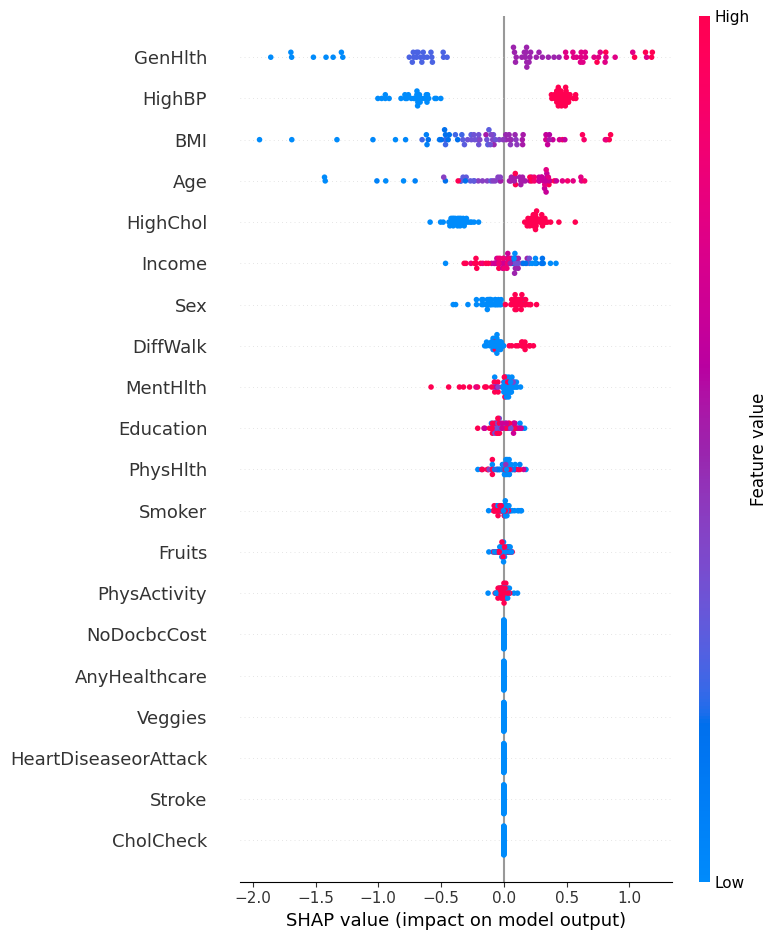

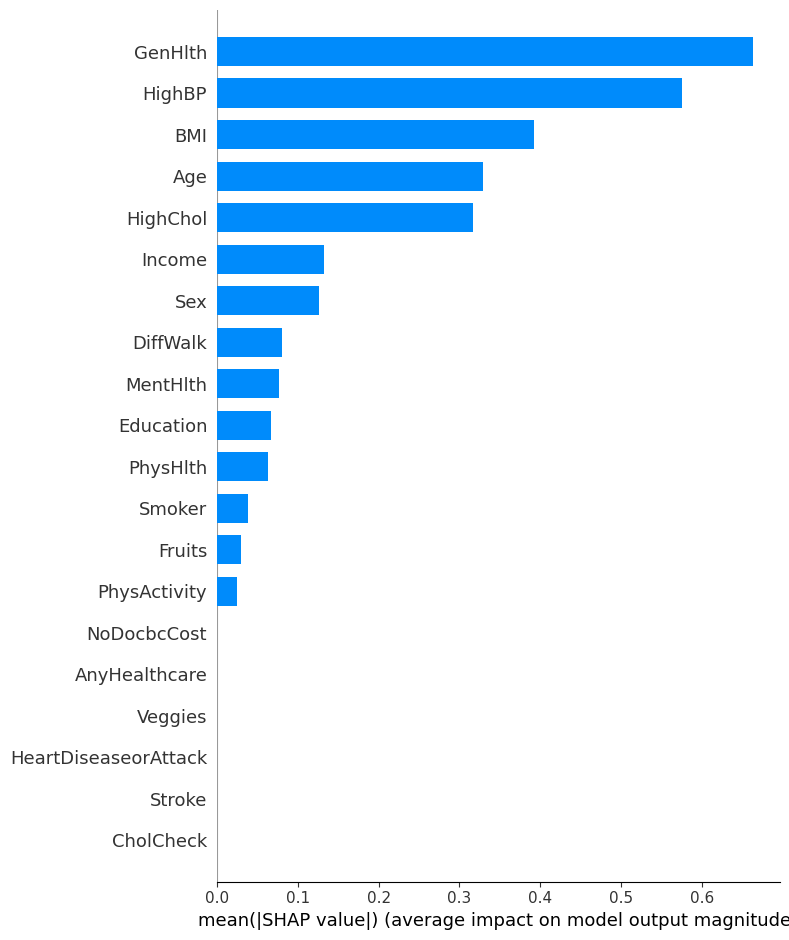

In [82]:
# Create SHAP explainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)  # Replace xgb_model with your trained XGBoost model
shap_values_xgb = explainer_xgb.shap_values(X_test_sample)

# Plot SHAP Summary for XGBoost
shap.summary_plot(shap_values_xgb, X_test_sample, feature_names=X.columns)

# Optional: SHAP Bar Plot for XGBoost
shap.summary_plot(shap_values_xgb, X_test_sample, feature_names=X.columns, plot_type="bar")


## shape for Gradient Boosting:

This section presents the SHAP analysis for the Gradient Boosting model, offering insights into feature importance. The summary plot visualizes how individual features influence predictions, with colors representing feature values. Features like "GenHlth," "HighBP," and "BMI" show strong impacts. The bar plot complements this by ranking features by their average SHAP value, highlighting their overall influence. Together, these plots deepen understanding of the model's decision-making, emphasizing transparency and interpretability.

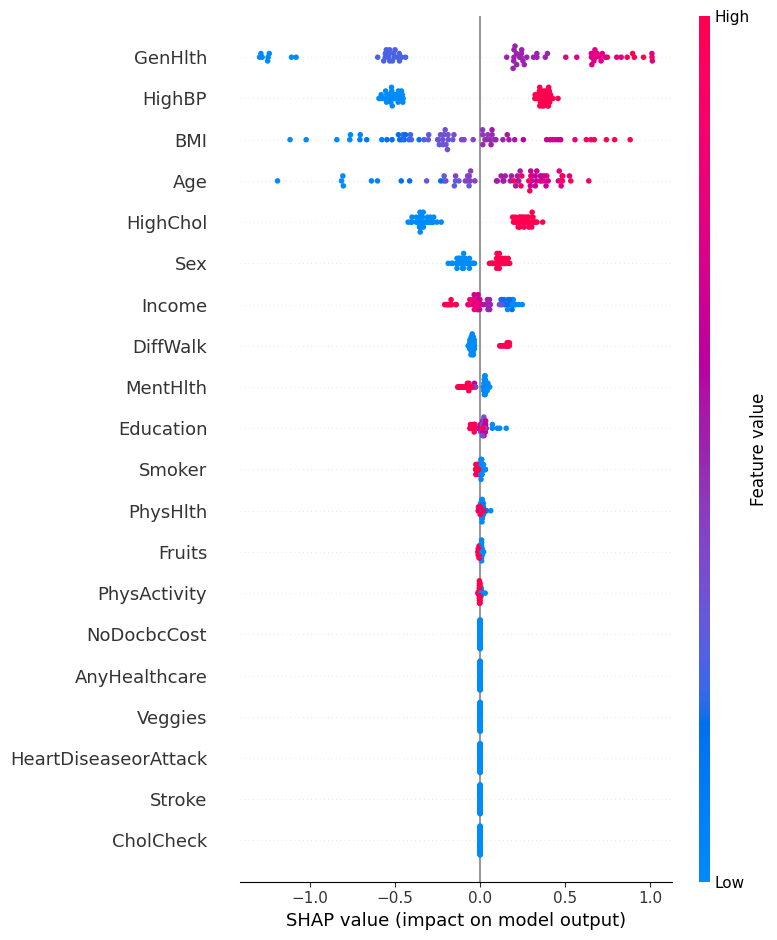

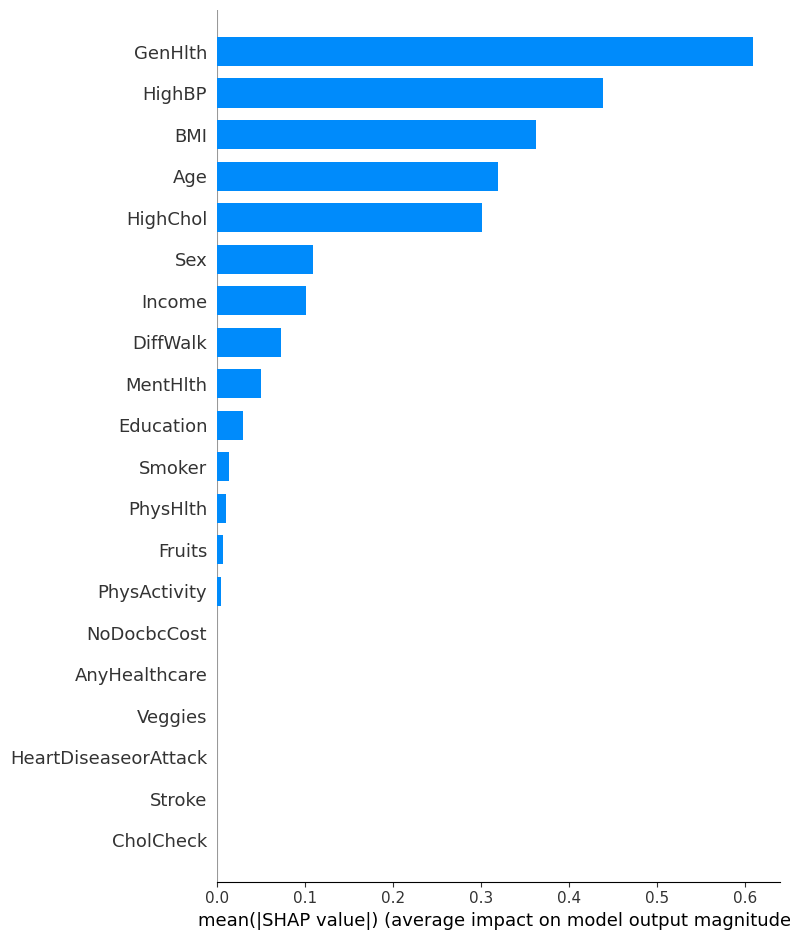

In [83]:
import shap

# Create SHAP explainer for Gradient Boosting
explainer_gb = shap.TreeExplainer(gb_model)  # Replace gb_model with your trained Gradient Boosting model
shap_values_gb = explainer_gb.shap_values(X_test_sample)

# Plot SHAP Summary for Gradient Boosting
shap.summary_plot(shap_values_gb, X_test_sample, feature_names=X.columns)

# Optional: SHAP Bar Plot for Gradient Boosting
shap.summary_plot(shap_values_gb, X_test_sample, feature_names=X.columns, plot_type="bar")


## Shape for MLP

This part demonstrates the use of SHAP (SHapley Additive exPlanations) for interpreting the feature importance in the MLP (Multi-Layer Perceptron) model. The SHAP summary plot and bar chart highlight the contribution of individual features to the model's predictions. Key features like "GenHlth," "HighBP," and "BMI" stand out as the most impactful in influencing predictions. These insights enable a deeper understanding of how the model leverages various features to make decisions and can guide further refinement of the model or feature set.

🕒 *Please note that running the code can take up to 7 minutes.*

  0%|          | 0/71 [00:00<?, ?it/s]

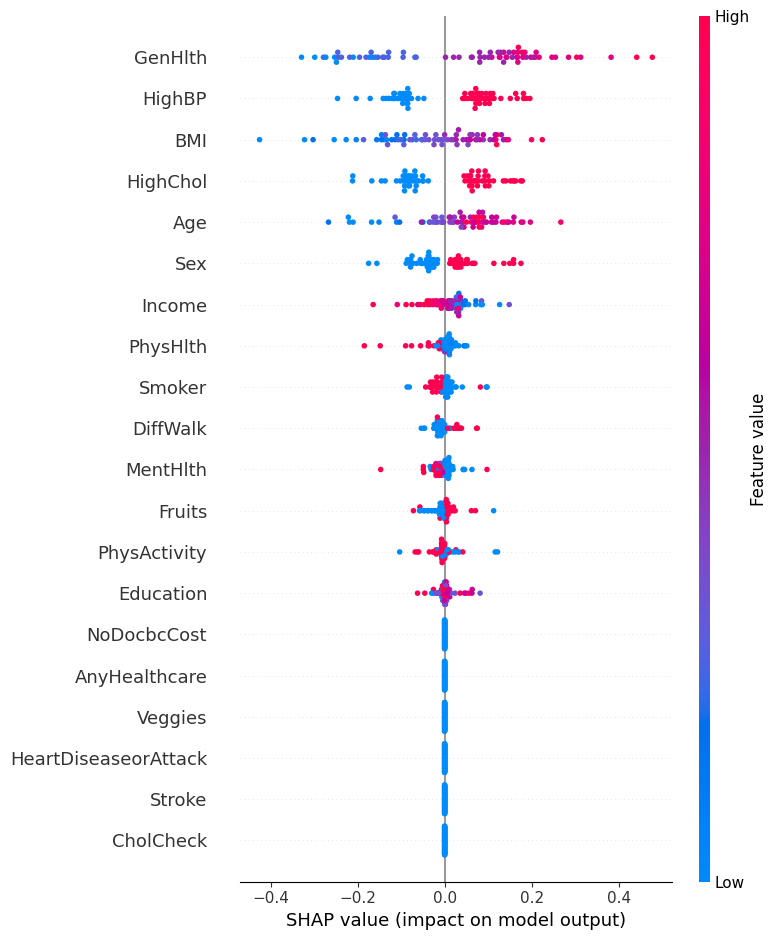

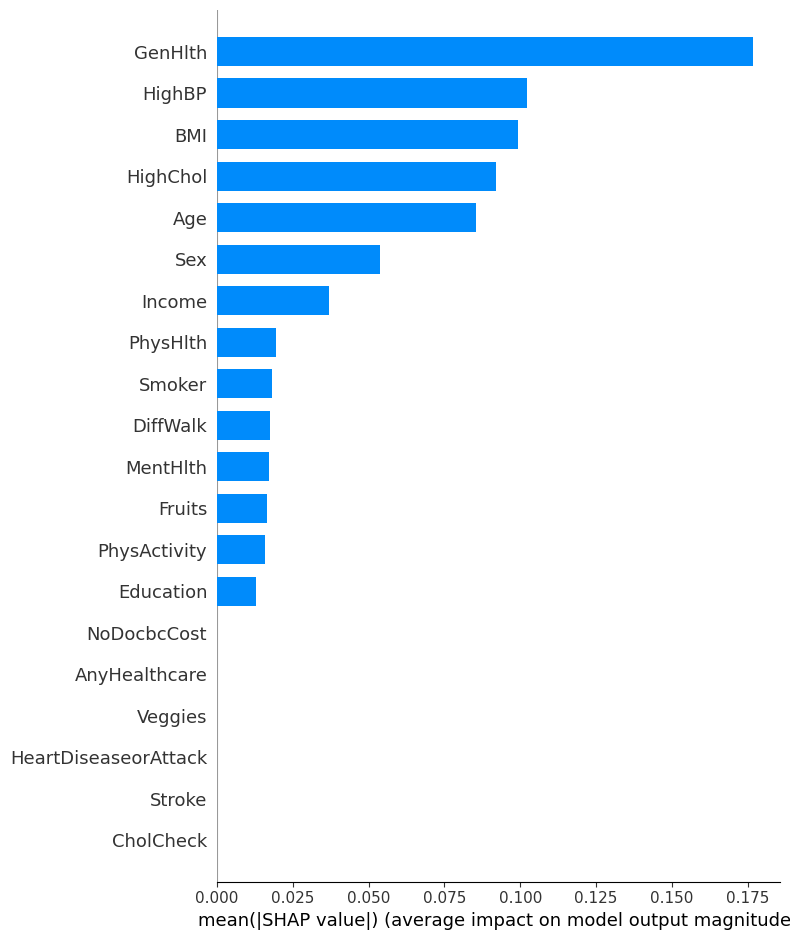

In [84]:
# Create SHAP explainer for MLP
explainer_mlp = shap.KernelExplainer(mlp_model.predict, X_train_sample)  # Replace mlp_model with your trained MLP model
shap_values_mlp = explainer_mlp.shap_values(X_test_sample)

# Plot SHAP Summary for MLP
shap.summary_plot(shap_values_mlp, X_test_sample, feature_names=X.columns)

# Optional: SHAP Bar Plot for MLP
shap.summary_plot(shap_values_mlp, X_test_sample, feature_names=X.columns, plot_type="bar")


## **10. Results Discussion**

##Define the Results Table

This section summarizes model performance in a results table, displaying key metrics like Accuracy, Precision, Recall, F1-Score, and AUC-ROC for each model. These metrics facilitate a comprehensive comparison of the models to identify the most effective one for the dataset. Let me know if you need additional insights!

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Multi-Layer Perceptron (MLP)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])


In [86]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost", "MLP"],
    "Accuracy": [accuracy_lr, accuracy_rf, accuracy_gb, accuracy_xgb, accuracy_mlp],
    "Precision": [precision_lr, precision_rf, precision_gb, precision_xgb, precision_mlp],
    "Recall": [recall_lr, recall_rf, recall_gb, recall_xgb, recall_mlp],
    "F1-Score": [f1_lr, f1_rf, f1_gb, f1_xgb, f1_mlp],
    "AUC-ROC": [auc_lr, auc_rf, auc_gb, auc_xgb, auc_mlp],
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.742574   0.726999  0.763370  0.744741  0.822399
1        Random Forest  0.732673   0.709388  0.773433  0.740028  0.798414
2    Gradient Boosting  0.751202   0.726006  0.793847  0.758412  0.828983
3              XGBoost  0.750071   0.724129  0.794710  0.757779  0.822771
4                  MLP  0.742857   0.710127  0.806498  0.755250  0.822004


## **Discussion**


In this project, we evaluated multiple machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, and XGBoost, to predict diabetes based on health indicators. Among these, **Gradient Boosting** and **XGBoost** emerged as the best-performing models due to their superior predictive capabilities and robust performance metrics.

Both models achieved high AUC-ROC scores (Gradient Boosting: ~0.83, XGBoost: ~0.83), indicating excellent class separability. Gradient Boosting demonstrated balanced recall and precision, making it a strong candidate for this classification task. However, **XGBoost** was chosen as the most **suitable model** for this problem due to its additional advantages, including advanced features like built-in regularization, efficient handling of missing values, and scalability for large datasets. Furthermore, **XGBoost integrates seamlessly with tools like SHAP** for feature importance analysis, offering valuable insights into the key health indicators influencing diabetes risk.

These characteristics, combined with its balanced F1-score and recall, position XGBoost as the optimal model for this healthcare prediction task, providing both accuracy and interpretability in identifying individuals at risk for diabetes.

* the ROC Curve of XGBoost

The ROC curve for the XGBoost model demonstrates a strong predictive performance with an AUC score of 0.83, indicating its high ability to distinguish between diabetes and non-diabetes cases. The curve's clear bend towards the top-left corner reflects the model's effective balance between sensitivity and specificity. Compared to the diagonal chance line (AUC = 0.5), XGBoost significantly outperforms a random classifier, making it a reliable choice for healthcare predictions where accurate classification is critical.

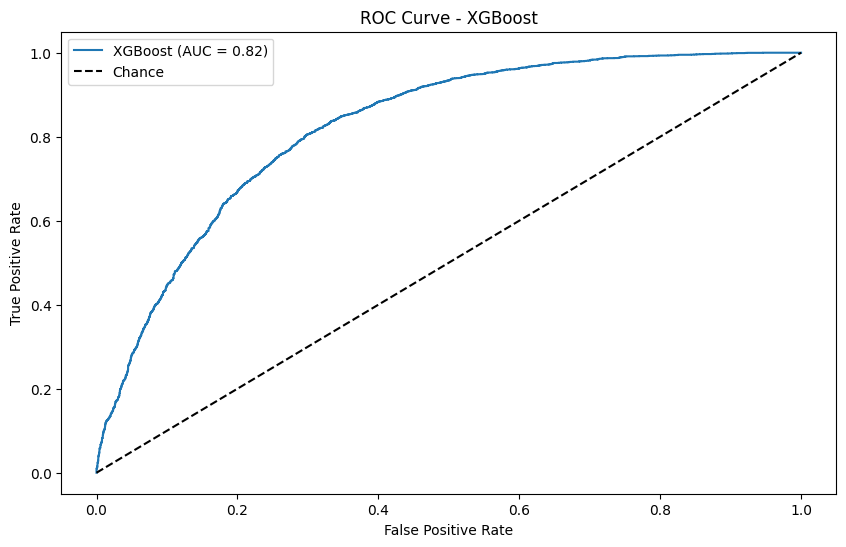

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()


## **Conclusion**



This project successfully addressed the objective of predicting diabetes prevalence based on health indicators using machine learning models. By analyzing a comprehensive dataset with features such as BMI, blood pressure, cholesterol levels, and lifestyle factors, we identified key trends and relationships that influence diabetes risk.

Among the evaluated models, **XGBoost** emerged as the most suitable choice due to its robust performance, achieving a high AUC-ROC score (~0.83) and demonstrating exceptional ability to distinguish between diabetic and non-diabetic cases. The model's interpretability through feature importance analysis provided valuable insights, confirming the critical role of factors like high cholesterol, BMI, and physical activity in predicting diabetes.

Overall, this study not only achieved its goal of building an accurate and interpretable prediction model but also highlighted important health indicators that can guide future preventive and diagnostic strategies. These findings contribute to the broader effort of leveraging machine learning in healthcare to support early detection and effective management of chronic diseases like diabetes.